# Smart Retail Solutions Limited
## About the company
## Problem statement
A retail company aims to improve customer engagement and increase sales by
implementing a Customer SegmentaƟon & RecommendaƟon System using Machine Learning (ML)
techniques. The company wants to divide its customer base into disƟnct segments based on their
purchasing behavior and preferences. AddiƟonally, they want to develop a recommendaƟon system that
provides personalized product recommendaƟons to customers within each segment.
## OBjectives
* Segment customers into meaningful groups based on their purchasing behavior, and other
relevant factors.
* Develop a recommendaƟon system that suggests products tailored to the preferences and
interests of each customer segment.
* Enhance customer experience and increase sales by providing targeted and personalized
recommendaƟons.
* Evaluate the performance of the segmentaƟon and recommendaƟon system through metrics
such as customer engagement, conversion rates, and revenue growth.

By addressing this business problem, the retail company can leverage machine learning technology to
segment its customer base, deliver personalized recommendaƟons, and drive business growth through
enhanced customer engagement and sales.

### Data soucre

In [147]:
# Importing the important libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [148]:
# Loading the dataset

data = pd.read_csv('data.csv', encoding='latin1')

# Display the first few rows of the DataFrame

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploratory Data Analysis


In [149]:
#Checking the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [150]:
# A preview of the first 5 columns
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [151]:
#Checking shape of the dataset: 
data.shape

(541909, 8)

In [152]:
#A summary of the dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [153]:
#Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [154]:
#Number of unique customer id's 
data["CustomerID"].nunique()

4372

In [155]:
#Finding the number of invoices that are cancelled. 

# Filter rows where 'InvoiceNo' column starts with 'C'
cancelled_invoices = data[data["InvoiceNo"].str.startswith("C")]

# Count the number of rows in the filtered DataFrame
count_cancelled_invoices = cancelled_invoices.shape[0]

print("Number of cancelled invoices:", count_cancelled_invoices)


Number of cancelled invoices: 9288


### Inferences
* Missing data in collumns Description and CustomerID

* Negative data in collumns Quantity and Unit price

* Precense of outliers in quantity and unit price 

* Presense of 10147 duplicate entries

* Presence of invoices that have been cancelled

* Column data types are not correctly formatted


In [156]:
#dropping the cancelled invoices
# Filter rows where 'InvoiceNo' column does not start with 'C' (i.e., keep non-cancelled invoices)
non_cancelled_invoices = data[~data["InvoiceNo"].str.startswith("C")]

# Print the shape of the DataFrame before dropping cancelled invoices
print("Shape of DataFrame before dropping cancelled invoices:", data.shape)

# Drop cancelled invoices from the original DataFrame
data = non_cancelled_invoices

# Print the shape of the DataFrame after dropping cancelled invoices
print("Shape of DataFrame after dropping cancelled invoices:", data.shape)


Shape of DataFrame before dropping cancelled invoices: (541909, 8)
Shape of DataFrame after dropping cancelled invoices: (532621, 8)


In [157]:
#dropping the missing values from customer id and description column
data = data.dropna(subset = ["CustomerID", "Description"])

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


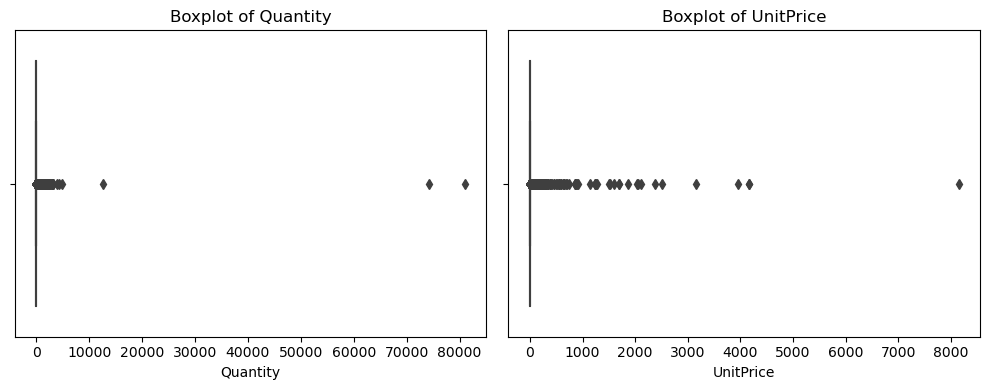

In [159]:
#Cheking for outliers
# Set the size of the overall figure
plt.figure(figsize=(10, 4))

# Create subplots for Quantity and UnitPrice
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Outliers will not be removed in this stage as they are essential to the feature engineering stage. 

In [160]:
#Changing to suitable data types

# Convert 'InvoiceNo' to numeric
data.loc[:, 'InvoiceNo'] = pd.to_numeric(data['InvoiceNo'], errors='coerce')

# Convert 'Description' to string
data.loc[:, 'Description'] = data['Description'].astype(str)

# Convert 'Quantity' to numeric
data.loc[:, 'Quantity'] = pd.to_numeric(data['Quantity'])

# Convert 'InvoiceDate' to datetime
data.loc[:, 'InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Convert 'UnitPrice' to float
data.loc[:, 'UnitPrice'] = data['UnitPrice'].astype(float)

# Convert 'CustomerID' to numeric
data.loc[:, 'CustomerID'] = pd.to_numeric(data['CustomerID'])

# Convert 'Country' to string (object)
data.loc[:, 'Country'] = data['Country'].astype(str)


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [163]:
# Check for negative values in 'Quantity'
negative_quantity = data[data['Quantity'] < 0]

# Check for values less than 1 in 'UnitPrice'
negative_unit_price = data[data['UnitPrice'] < 1]

# Check for values equal to 0 in 'UnitPrice'
zero_unit_price = data[data['UnitPrice'] == 0]

# Print the number of rows with negative values in each column
print("Number of rows with negative values in 'Quantity':", len(negative_quantity))
print("Number of rows with values less than 1 in 'UnitPrice':", len(negative_unit_price))
print("Number of rows with values equal to 0 in 'UnitPrice':", len(zero_unit_price))



Number of rows with negative values in 'Quantity': 0
Number of rows with values less than 1 in 'UnitPrice': 93013
Number of rows with values equal to 0 in 'UnitPrice': 40


Unit price can be in decimals as well e.g 0.85 pounds